In [26]:
import pandas as pd
import numpy as np

In [27]:
lower_file = '~/Clubs/Launch/Zephyr/FSW.git/app/other/airbraker/data/omen_quantile_luts/lower_bounds.csv'
upper_file ='~/Clubs/Launch/Zephyr/FSW.git/app/other/airbraker/data/omen_quantile_luts/upper_bounds.csv'


In [28]:
lower = pd.read_csv(lower_file)
upper = pd.read_csv(upper_file)

In [29]:
indices_agree = np,all(lower.alt == upper.alt)
if not indices_agree:
    print("Baseline assumption failed. indices dont agree")

In [30]:
minVal = lower.alt.iloc[0]
maxVal = lower.alt.iloc[-1]
num = len(lower.alt)

In [31]:
print(f"Bounds: {minVal} to {maxVal} with {num} samples")

Bounds: 1200.0 to 3300.0 with 100 samples


In [44]:
def gen_index(val, lo, hi, num_els):
    if (val < lo): return 0, 0
    if (val > hi): return num_els - 2, 1

    find = (num-1) * (val - lo) / (hi-lo)

    whole =  int(find)
    frac = find-whole
    if (whole >= num_els -1):
        return hi-2, 1
    
    return whole, frac

def lerp(amt, down, up):
    return down * (1-amt) + up * amt

def gen_both(whole, frac, lowers, uppers):
    downL, upL = lowers[whole], lowers[whole+1]
    downU, upU = uppers[whole], uppers[whole+1]
    return lerp(frac, downL, upL), lerp(frac, downU, upU)

def Q(z_hat_min, z_hat_max, z_hat):
    val = (z_hat - z_hat_min)/ (z_hat_max - z_hat_min)
    if (val > 1): return 1
    if val < 0: return 0
    return val

In [42]:
def get_effort(alt_est, vel_est):
    i, f = gen_index(alt_est, minVal, maxVal, num)
    if (i >= 99):
        print(f'too high alt={alt_est}, vel={vel_est}, i={i}, f={f}')
        return np.nan;
    z_min, z_max = gen_both(i, f, lower.vel, upper.vel)
    q = Q(z_min, z_max, vel_est)
    return q

In [34]:
ork_flight = pd.read_csv('ork.csv')

In [35]:
ork_flight

,# Time (s),Altitude (m),Vertical velocity (m/s),Vertical acceleration (m/s²),Total velocity (m/s),Total acceleration (m/s²),Position East of launch (m),Position North of launch (m),Lateral distance (m),Lateral direction (°),...,Reference length (cm),Reference area (cm²),Vertical orientation (zenith) (°),Lateral orientation (azimuth) (°),Wind velocity (m/s),Air temperature (°C),Air pressure (mbar),Speed of sound (m/s),Simulation time step (s),Computation time (s)
0,0.002000,-0.000008,-0.007830,-3.914718,0.007849,3.924277,-5.000000e-07,0.000000,5.000000e-07,180.000000,...,15.748,194.778355,86.0,0.0,6.724043,5.978000,857.473600,334.921568,0.002000,0.033167
1,0.004000,0.000016,0.015488,7.744380,0.015526,7.763291,1.100000e-06,0.000000,1.100000e-06,0.000000,...,15.748,194.778355,86.0,0.0,6.734878,5.978000,857.473598,334.921568,0.002000,0.040457
2,0.006000,0.000085,0.054296,19.404843,0.054428,19.452228,6.000000e-06,0.000000,6.000000e-06,0.000000,...,15.748,194.778355,86.0,0.0,6.745713,5.977999,857.473591,334.921568,0.002000,0.046435
3,0.008000,0.000256,0.116427,31.066669,0.116711,31.142531,1.790000e-05,0.000000,1.790000e-05,0.000000,...,15.748,194.778355,86.0,0.0,6.756548,5.977998,857.473572,334.921567,0.002000,0.052855
4,0.010000,0.000574,0.201883,42.729859,0.202376,42.834201,4.020000e-05,0.000000,4.020000e-05,0.000000,...,15.748,194.778355,86.0,0.0,6.767383,5.977996,857.473539,334.921566,0.002000,0.059366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3614,161.617898,10.702660,-6.562961,0.005771,6.563284,0.385860,3.525654e+02,1.378500,3.525681e+02,0.224020,...,NaN,NaN,NaN,NaN,6.845281,5.887098,855.986011,334.866482,0.500000,3.287429
3615,162.117898,7.421112,-6.563231,-0.000539,6.563515,0.361598,3.491554e+02,1.378313,3.491582e+02,0.226178,...,NaN,NaN,NaN,NaN,6.668556,5.908433,856.335143,334.879410,0.500000,3.287578
3616,162.617898,4.139882,-6.561692,0.003078,6.561958,0.350784,3.458345e+02,1.378130,3.458372e+02,0.228319,...,NaN,NaN,NaN,NaN,6.495094,5.929763,856.684206,334.892336,0.500000,3.287743
3617,163.117898,0.858477,-6.563927,-0.004471,6.563930,0.040949,3.425624e+02,1.377952,3.425652e+02,0.230470,...,NaN,NaN,NaN,NaN,6.527485,5.951091,857.033235,334.905261,0.500000,3.287896


In [47]:
ork_flight['effort'] = ork_flight.apply(lambda r : get_effort(r['Altitude (m)'], r['Vertical velocity (m/s)']), axis=1)

<Axes: xlabel='# Time (s)'>

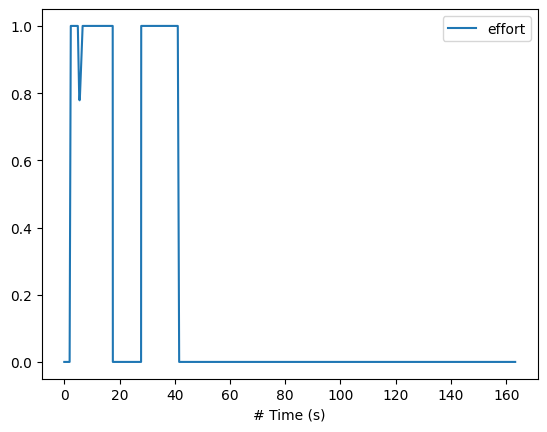

In [53]:
ork_flight[['# Time (s)', 'effort']].plot(x='# Time (s)')